<img src='https://github.com/tmaitland/python-for-ai/blob/main/images/Practicum_AI_Logo.white_outline.svg?raw=1' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_python.png?raw=true' align='right' width=50>
***

# What Went Wrong??

Whether it's a typo or trying to solve a complex problem, you will undoubtedly encounter errors when coding! <img src='https://github.com/PracticumAI/python-for-ai/blob/main/images/frustrating_error.png?raw=true' alt='Icon of a person with a hand on head and an exclamation point' width=150 align='right'>

Mistakes, errors, problem-solving, and, unfortunately, frustration are sometimes part of coding. Those can also lead to great joy when these problems are solved!

But learning to solve problems is also something that can take practice. We will all run into errors, but having resources and experience to solve those errors rather than giving up is critical.

This notebook is designed to help lead you through how we solve some common errors. We will look at:

* Strategies for interpreting error messages
* Online resources for finding help with errors
* New possibilities with AI-powered tools to solve errors

## Common typos

Let's start trying to solve some of these errors. Each cell below has code that will generate an error. Can you fix them?

In [2]:
my_value = 5
print(f'I am storing the value {my_value}')

I am storing the value 5


In [5]:
def print_message():
    print("If this prints you fixed the error!")
print(print_message())

If this prints you fixed the error!
None


In [8]:
import pandas as pd

url='https://raw.githubusercontent.com/PracticumAI/python-for-ai/main/data/gapminder_all.csv' # Direct link to the dataset on GitHub
df = pd.read_csv(url)
print(df)

    continent         country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0      Africa         Algeria     2449.008185     3013.976023     2550.816880   
1      Africa          Angola     3520.610273     3827.940465     4269.276742   
2      Africa           Benin     1062.752200      959.601080      949.499064   
3      Africa        Botswana      851.241141      918.232535      983.653976   
4      Africa    Burkina Faso      543.255241      617.183465      722.512021   
..        ...             ...             ...             ...             ...   
137    Europe     Switzerland    14734.232750    17909.489730    20431.092700   
138    Europe          Turkey     1969.100980     2218.754257     2322.869908   
139    Europe  United Kingdom     9979.508487    11283.177950    12477.177070   
140   Oceania       Australia    10039.595640    10949.649590    12217.226860   
141   Oceania     New Zealand    10556.575660    12247.395320    13175.678000   

     gdpPercap_1967  gdpPer

Ok, that last one isn't really a typo but a difference in how things are imported. Nothing is wrong with the `import pandas` line, but you will get an error if you try to use the common alias `pd`.

## The wall of red

Sometimes, the error message is very long, and you are faced with a wall of red that can be intimidating. In these cases, the best solution is to start at the bottom of the error and work up a few lines to see if you can determine the source of the error.

Have a try at this one:

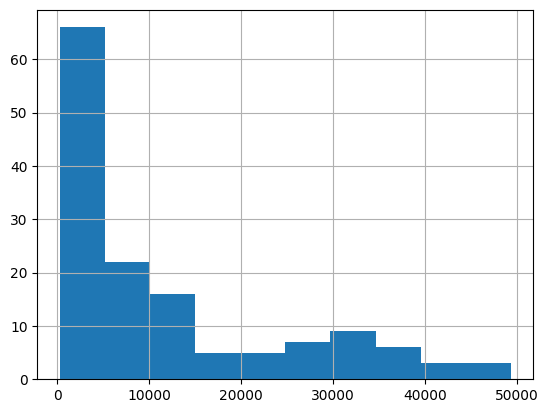

In [11]:
import pandas as pd

url='https://raw.githubusercontent.com/PracticumAI/python-for-ai/main/data/gapminder_all.csv' # Direct link to the dataset on GitHub
df = pd.read_csv(url) # Create the dataframe from the given URL
hist = df['gdpPercap_2007'].hist()


   `KeyError: 'gdpPercap_2024'`

It seems like a lot of text to tell you that the column `gdpPercap_2024` doesn't exist. `KeyError`s are pretty common mistakes and mean that you are trying to access a column that doesn't exist. There isn't data for 2024 in this case, but sometimes it's a typo in the name or an extra space somewhere.

But, again, scrolling to the bottom gives the best summary of what went wrong.

Scrolling back up a ways, you will see the line where the error occurred:

   `----> 5 hist = df['gdpPercap_2024'].hist()`
   
Though that can sometimes be off by a few lines, and the line called out is just where things stopped.


## Not all red is bad!

Especially in AI, there are a few common cases where red output text doesn't mean things failed.

1. With the rapid development of AI frameworks, it is common that functions are renamed, moved, replaced, or modified in other ways. In most cases, the developers will warn you that this is happening in the future and start issuing what are called **deprecation** warnings--something that is deprecated is being phased out and will, at some point, stop working. Take note of these warnings, especially if you are developing code you hope to use for a while. Changing to the new name/function/way of calling the feature now may save you trouble in the future. But, despite the warning, the function will still work for now.

   * In the example below, the deprecated function wasn't even called in our code but by a function we called. In this case, you can try updating the package or ignore it for now.

   ![Screenshot of a deprecation warning](https://github.com/tmaitland/python-for-ai/blob/main/images/deprecation_warning.png?raw=1)
  
   * The deprecation warning reads, "The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead." This means the `rowNum` parameter is being phased out and will not be supported after Matplotlib 3.4 (two minor versions later). A replacement is also suggested.


2. Another common source of red output that can be ignored is when you are using GPUs. ("GPU" stands for "Graphics Processing Unit". GPUs are specialized computing hardware that can make AI and machine learning work *much* faster. GPUs are available on SCINet's Atlas cluster.) Often, when you first access the GPU, there is some logging and information about the GPU displayed. It would be nice if this were in a different color, but it's shown in red even though nothing is wrong!

   This text is common when the GPU is first accessed:
   ![Warning seen when a GPU is first accessed](https://github.com/PracticumAI/python-for-ai/blob/main/images/gpu_warning.png?raw=true)
   
   and this is common when you start a training run.
   
   ![Warning seen when a GPU is first accessed](https://github.com/PracticumAI/python-for-ai/blob/main/images/gpu_warning2.png?raw=true)
   
   **Both red blocks are logging messages and can be safely ignored. Despite the color, nothing has gone wrong!**

## CUDA Memory errors


Another class of error that you may encounter in working through notebooks, either in this course or in your development, is a CUDA out-of-memory error. CUDA is the programming language that interfaces with the GPU. When things work well, the error is relatively straightforward, e.g.:

![CUDA out of memory error](https://github.com/PracticumAI/python-for-ai/blob/main/images/CUDA_OOM.png?raw=true)

When things don't work well, the error can be more cryptic, and it can be hard to understand what went wrong.

> The Python libraries we use work behind the scenes to communicate with CUDA, so you don't need to worry about it much. But when you see CUDA, know that it means something to do with a GPU.

The source of the issue is that because there is time spent in moving data from the CPU memory (the computer's main RAM chips) to the GPU memory (the much more limited RAM built into the GPU itself), Python tries to minimize data movement. While notebooks are pretty good at managing the memory within a single notebook, a notebook will attempt to keep its memory on the GPU and not let other notebooks use the GPU RAM.

So, if you have multiple notebooks open in a session, it is common to have odd errors caused by out-of-memory (OOM) situations. In many cases, Python recognizes and reports the error, but sometimes, hard-to-diagnose errors are displayed. In general, especially in our course notebooks, when you get an error, especially one using the GPU, suspect that there may be an out-of-memory error.

To solve this, use the "Running Terminals and Kernels" panel and stop the kernels for notebooks you are not using. In this screenshot, there are several running notebooks:

  ![screenshot of the Running Terminals and Kernels panel showing running notebook kernels](https://github.com/PracticumAI/python-for-ai/blob/main/images/Kernel_control.png?raw=true)
  
  Either use the "**Shut Down All**" button or close individual kernels. Unfortunately, you might need to restart the kernel for the notebook you are using and re-run all the cells from the top.

## What do you do when an error doesn't make sense?

If you run into an issue where the cause of an error isn't clear, where do you go for help?

Google (or another search engine) is usually a good starting point. The top results frequently have good information about the cause of the error. Here are sites with which you will likely become familiar:

* [Stack Overflow](https://stackoverflow.com/): This is a great resource, and Google search results frequently feature relevant Stack Overflow posts where a user asks a question that resulted in an error similar to yours, and there are solutions provided. Other users can up-vote solutions to indicate that these are correct and helpful.
* [Towards Data Science](https://towardsdatascience.com/) and [Medium](https://medium.com/): Towards Data Science is a blog that has multiple authors covering data science and AI tools. While not always a top hit in finding solutions, this site is frequently a resource when looking for methods for AI applications. Towards Data Science is part of a larger collection of sites under the Medium umbrella, with other sites, some of which also have great AI-focused content. Unfortunately, some of the content on these sites requires registration or subscription.